<a href="https://colab.research.google.com/github/ChandaSourav/MachineLearning/blob/main/Crop_Prediction_Sourav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [ ]:
#for data manipulations
import numpy as np
import pandas as pd
#for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
#for interactive analysis
from ipywidgets import interact
import warnings
warnings.filterwarnings("ignore")

**Load Dataset**

In [ ]:
data=pd.read_csv("/content/data.csv")
print(data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


**Missing data checking**

<Axes: >

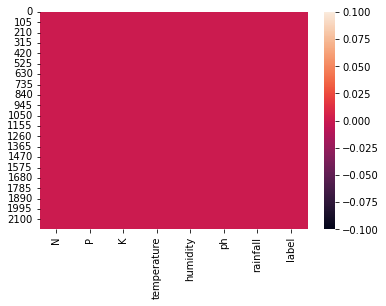

In [ ]:
sns.heatmap(data.isnull())

**Seasonal crops**

Summer's crops

In [ ]:
print(data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())

['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']


**Monsoon's Crops**

In [ ]:
print(data[(data['rainfall']>200) & (data['humidity']>50)]['label'].unique())

['rice' 'papaya' 'coconut']


**Winter Crops**

In [ ]:
print(data[(data['temperature']<20) & (data['humidity']<50)]['label'].unique())

['chickpea' 'kidneybeans' 'pigeonpeas']


**Crops Wise Requirements**

In [ ]:
@interact
def summary(crops=list(data['label'].value_counts().index)):
  x=data[data['label']==crops]
  print("Min Nitrogen required",x['N'].min())
  print("Avg Nitrogen required",x['N'].mean())
  print("Max Nitrogen required",x['N'].max())
  print("-----------------------------")
  print("Min Phosphorus required",x['P'].min())
  print("Avg Phosphorus required",x['P'].mean())
  print("Max Phosphorus required",x['P'].max())
  print("-----------------------------")
  print("Min Potassium required",x['K'].min())
  print("Avg Potassium required",x['K'].mean())
  print("Max Potassium required",x['K'].max())
  print("-----------------------------")
  print("Min PH required",x['ph'].min())
  print("Avg PH required",x['ph'].mean())
  print("Max PH required",x['ph'].max())
  print("-----------------------------")
  print("Min Temperature required",x['temperature'].min())
  print("Avg Temperature required",x['temperature'].mean())
  print("Max Temperature required",x['temperature'].max())
  print("-----------------------------")
  print("Min Humidity required",x['humidity'].min())
  print("Avg Humidity required",x['humidity'].mean())
  print("Max Humidity required",x['humidity'].max())
  print("-----------------------------")
  print("Min Rainfall required",x['rainfall'].min())
  print("Avg Rainfall required",x['rainfall'].mean())
  print("Max Rainfall required",x['rainfall'].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

**Graph for Multivareance**

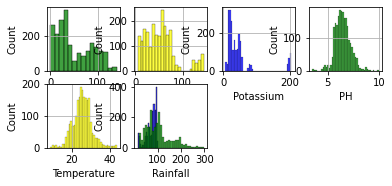

In [ ]:
plt.subplot(3,4,1)
sns.histplot(data['N'],color="green")
plt.xlabel("Nitrogen")
plt.grid()

plt.subplot(3,4,2)
sns.histplot(data['P'],color="yellow")
plt.xlabel("Phosphorus")
plt.grid()

plt.subplot(3,4,3)
sns.histplot(data['K'],color="blue")
plt.xlabel("Potassium")
plt.grid()

plt.subplot(3,4,4)
sns.histplot(data['ph'],color="green")
plt.xlabel("PH")
plt.grid()

plt.subplot(3,4,5)
sns.histplot(data['temperature'],color="yellow")
plt.xlabel("Temperature")
plt.grid()

plt.subplot(3,4,6)
sns.histplot(data['humidity'],color="blue")
plt.xlabel("Humidity")
plt.grid()

plt.subplot(3,4,6)
sns.histplot(data['rainfall'],color="green")
plt.xlabel("Rainfall")
plt.grid()

**Elbow Method To Determine Cluster Size**

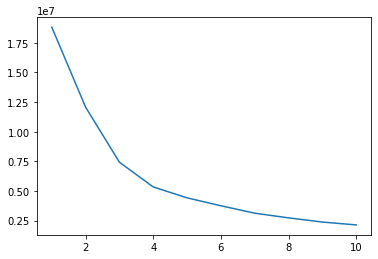

In [ ]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans

x= data.drop(['label'],axis=1)
x=x.values
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init="k-means++",max_iter=2000,n_init=10,random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.show()

**Clustering**

In [ ]:
km=KMeans(n_clusters=4,init="k-means++",max_iter=2000,n_init=10,random_state=0)
y_means=km.fit_predict(x)

a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)

z=z.rename(columns={0:'cluster'})

print("Cluster 1",z[z['cluster']==0]['label'].unique())
print("Cluster 2",z[z['cluster']==1]['label'].unique())
print("Cluster 3",z[z['cluster']==2]['label'].unique())
print("Cluster 4",z[z['cluster']==3]['label'].unique())

Cluster 1 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Cluster 2 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Cluster 3 ['grapes' 'apple']
Cluster 4 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


**Crop Prediction**

In [ ]:
y=data['label']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(np.array([[20,30,40,20,80,7,100]]))
print(y_pred)

['pomegranate']


**Accuracy And Confusion Matrix**

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

<Axes: >

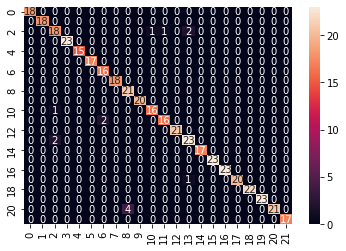

In [ ]:
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)